<a href="https://colab.research.google.com/github/AlinaSalaieva/NM/blob/main/%D0%9B%D0%A0_%D0%A1%D0%B0%D0%BB%D0%B0%D1%94%D0%B2%D0%B0_12%D0%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
numpy_version = np.version
numpy_version

<module 'numpy.version' from '/usr/local/lib/python3.12/dist-packages/numpy/version.py'>

Створення матриці 3х3 і заповнення випадковими числами від 1 до 5

In [2]:
matrix = np.random.randint(1, 6, size=(3, 3))
matrix

array([[3, 5, 5],
       [1, 3, 4],
       [2, 1, 3]])

Обчислити визначник матриці

In [3]:
det = np.linalg.det(matrix)
det

np.float64(15.0)

Знайти добуток елементів

In [4]:
product = np.prod(matrix)
product

np.int64(5400)

In [5]:
prod_1 = np.prod(matrix[0])
prod_2 = np.prod(matrix[1])
prod_3 = np.prod(matrix[2])
prod_1*prod_2*prod_3

np.int64(5400)

Знайти суму елементів

In [6]:
np.sum(matrix)

np.int64(27)

Знайти максимум

In [7]:
np.max(matrix)

np.int64(5)

Знайти мінімум

In [8]:
np.min(matrix)

np.int64(1)

Знайти середнє значення

In [9]:
mean = np.mean(matrix)
print(mean)

3.0


Обчислити матрицю квадратних коренів

In [10]:
sqrt_matrix = np.sqrt(matrix)
print(sqrt_matrix)

[[1.73205081 2.23606798 2.23606798]
 [1.         1.73205081 2.        ]
 [1.41421356 1.         1.73205081]]


Обчислити суму елементів кожного рядка

In [11]:
row_sum = np.sum(matrix, axis=-1).reshape(-1, 1)
print(row_sum)

[[13]
 [ 8]
 [ 6]]


In [12]:
matrix.sum(axis=1).reshape(-1,1)

array([[13],
       [ 8],
       [ 6]])

In [13]:
x = np.matrix([[1, 2], [3, 4]])
x

matrix([[1, 2],
        [3, 4]])

In [14]:
x.sum(axis=1)

matrix([[3],
        [7]])

Створення вектора з 25 елементів від 0 до 9 і сортування чисел за спаданням

In [15]:
vector = np.random.randint(0, 10, size=25)
vector

array([2, 6, 0, 5, 2, 6, 5, 4, 0, 3, 4, 3, 5, 3, 2, 2, 5, 6, 9, 5, 3, 8,
       1, 0, 5])

In [16]:
sorted_vector = np.sort(vector)[::-1]
sorted_vector

array([9, 8, 6, 6, 6, 5, 5, 5, 5, 5, 5, 4, 4, 3, 3, 3, 3, 2, 2, 2, 2, 1,
       0, 0, 0])

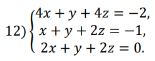

In [17]:
import numpy as np
a = np.array([
    [4, 1, 4],
    [1, 1, 2],
    [2, 1, 2],
])
b = np.array([[-2], [-1], [0]])

Матричний метод (2 спосіб)

In [18]:
def solve_inv_matrix(a, b, verbose=False):
    det = np.linalg.det(a)
    if verbose: print(f"Визначник матриці A: {round(det)}")
    if det == 0:
        print("Визначник дорівнює нулю - рішень немає")
        return None

    a_inv= np.linalg.inv(a)
    if verbose: print(f"Обернена матриця до матриці A: \r\n {a_inv }")
    return a_inv.dot(b)

print(f"Вектор рішення: \r\n {solve_inv_matrix(a, b)}")

Вектор рішення: 
 [[ 1.]
 [ 2.]
 [-2.]]


Метод Крамара (2 спосіб)

In [19]:
def solve_cramer(a, b, verbose=False):
    det = np.linalg.det(a)
    if verbose: print(f"Визначник матриці A: {round(det)}")
    if det == 0:
        print("Визначник дорівнює нулю - розв'язків немає")
        return None

    len_a = len(a)
    x = np.zeros((len_a, 1))
    for i in range(len_a):
        temp = np.copy(a)
        temp[:, [i]] = b
        x[i, 0] = np.linalg.det(temp)/det

    return x


print(f"Вектор рішення: \r\n {solve_cramer(a, b)}")

Вектор рішення: 
 [[ 1.]
 [ 2.]
 [-2.]]


Перевірка

In [20]:
x = np.linalg.solve(a, b)

print(x)

[[ 1.]
 [ 2.]
 [-2.]]


Метод Гауса

In [21]:
def solve_gausse(a, b, verbose=False):
    det = np.linalg.det(a)
    if verbose: print(f"Визначник матриці A: {round(det)}")
    if det == 0:
        print("Визначник дорівнює нулю - розв'язків немає")
        return None
    # Reading number of unknowns
    n = len(b)
    m = np.concatenate([a, b], axis=1, dtype=float)

    # Applying Gauss-Jordan Elimination
    for i in range(n):

        # Swap rows to avoid division by 0
        if m[i, i] == 0:
            for k in range(i+1, n):
                if m[k, k] != 0:
                    m[[i, k], :] = m[[k, i], :]
                    break


        if m[i, i] != 1:
            m[i, :] *= 1/m[i, i]

        for j in range(n):
            if i != j:
                ratio = m[j][i]/m[i][i]

                m[j, :] = m[j, :] - ratio * m[i, :]

    return m[:, [-1]]

print(f"Вектор рішення: \r\n {solve_gausse(a, b)}")

Вектор рішення: 
 [[ 1.]
 [ 2.]
 [-2.]]
